# Speech Commands Dataset

In [9]:
import os

from lib.scDataset import SpeechCommandsDataset

dataset_path = '/home/andyshao/data/speech_commands'
full_dataset = SpeechCommandsDataset(root_path=dataset_path, mode='full', include_rate=True)
train_dataset = SpeechCommandsDataset(root_path=dataset_path, mode='train', include_rate=False)
test_dataset = SpeechCommandsDataset(root_path=dataset_path, mode='test', include_rate=False)
val_dataset = SpeechCommandsDataset(root_path=dataset_path, mode='validation', include_rate=False)

len(full_dataset), len(train_dataset), len(test_dataset), len(val_dataset)

(64721, 51088, 6835, 6798)

In [10]:
command_full_dataset = SpeechCommandsDataset(root_path=dataset_path, mode='full', include_rate=True, data_type='commands')
command_train_dataset = SpeechCommandsDataset(root_path=dataset_path, mode='train', include_rate=False, data_type='commands')
command_test_dataset = SpeechCommandsDataset(root_path=dataset_path, mode='test', include_rate=False, data_type='commands')
command_val_dataset = SpeechCommandsDataset(root_path=dataset_path, mode='validation', include_rate=False, data_type='commands')

len(command_full_dataset), len(command_train_dataset), len(command_test_dataset), len(command_val_dataset)

(23682, 18538, 2567, 2577)

In [11]:
from lib.scDataset import BackgroundNoiseDataset
noise_dataset = BackgroundNoiseDataset(root_path=dataset_path)
for noise_type, noise, sample_rate in noise_dataset:
    print(f'{noise_type}, {noise.shape}, {sample_rate}')

pink_noise, torch.Size([1, 960000]), 16000
exercise_bike, torch.Size([1, 980062]), 16000
running_tap, torch.Size([1, 978488]), 16000
dude_miaowing, torch.Size([1, 988891]), 16000
white_noise, torch.Size([1, 960000]), 16000
doing_the_dishes, torch.Size([1, 1522930]), 16000


In [12]:
from IPython.display import Audio

wavform, label, sample_rate = full_dataset[0]
Audio(wavform, rate=sample_rate)


In [13]:
noise_type, noise, noise_sample_rate = noise_dataset[3]
Audio(noise[:, :sample_rate*3], rate=noise_sample_rate)

In [14]:
import torchaudio.functional as ta_f
import torch 

corrupted_wavform = ta_f.add_noise(waveform=wavform, noise=noise[:, :wavform.shape[1]], snr=torch.tensor([10, 3]))
Audio(corrupted_wavform[0:1], rate=sample_rate)

In [15]:
Audio(corrupted_wavform[1:2], rate=sample_rate)

In [16]:
from torchaudio import transforms as a_transforms
from lib.wavUtils import pad_trunc, time_shift, Components
max_ms = 1000
sample_rate = 16000
n_mels=129
hop_length=125
tf_array = [
    pad_trunc(max_ms=max_ms, sample_rate=sample_rate),
    # time_shift(shift_limit=.25, is_random=True, is_bidirection=True),
    a_transforms.MelSpectrogram(sample_rate=sample_rate, n_fft=1024, n_mels=n_mels, hop_length=hop_length),
    a_transforms.AmplitudeToDB(top_db=80),
    # ExpandChannel(out_channel=3),
    # v_transforms.Resize((256, 256), antialias=False),
    # v_transforms.RandomCrop(224),
    # v_transforms.RandomHorizontalFlip(), 
]
data_tf = Components(transforms=tf_array)
audio = data_tf(wavform)
audio.shape

torch.Size([1, 129, 129])

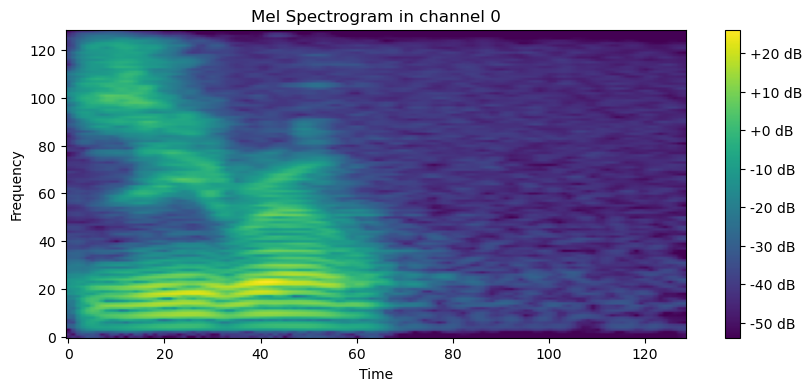

In [17]:
from lib.wavUtils import display_spectro_gram

display_spectro_gram(waveform=audio)